In [1]:
#BAS 476 Fall 2024 Project by Emma Lakatosh

In [2]:
import time
start_time = time.time()

In [3]:
from dash import Dash
from dash import dcc
from dash import html

import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go 
from dash.dependencies import Input, Output
from playsound import playsound
import sys

In [4]:
my_app=Dash('my app')

In [5]:
sample_size = 100000
total_rows = sum(1 for line in open('TNproperties.csv')) - 1
skip = sorted(np.random.choice(range(1, total_rows + 1), total_rows - sample_size, replace=False))

df_tn_prop = pd.read_csv('TNproperties.csv', skiprows=skip)

df_tn_prop['Sale Date'] = pd.to_datetime(df_tn_prop['Sale Date']) #making a column just for year
df_tn_prop['Year'] = df_tn_prop['Sale Date'].dt.year
starting_year = 2018

df_tn_prop.head()

RecordNumber  Sale Date  Sale Amount Property Type  Census Block  Zip_Code  \
0       1057238 2018-01-04        40000   Residential             2     37716   
1       1057272 2018-01-05       125000   Residential             2     37716   
2       1057436 2018-01-10       275000   Residential             1     37830   
3       1057511 2018-01-11       141000   Residential             2     37716   
4       1057898 2018-01-17        53000   Residential             1     37830   

    FIPS State    Lat    Lng  Year  
0  47001    TN  36.10 -84.17  2018  
1  47001    TN  36.10 -84.17  2018  
2  47001    TN  35.96 -84.29  2018  
3  47001    TN  36.10 -84.17  2018  
4  47001    TN  35.96 -84.29  2018

In [6]:
color_map = {
    "Residential": "#571F4E",
    "Commercial": "#BA2D0B",
    "Agricultural": "#38686A",
    "Industrial": "#EC9A29",
    "Open Space": "#4169E1"
}

property_types = df_tn_prop.groupby('Property Type')['Sale Amount'].count().index
color_sequence = [color_map[ptype] for ptype in property_types]

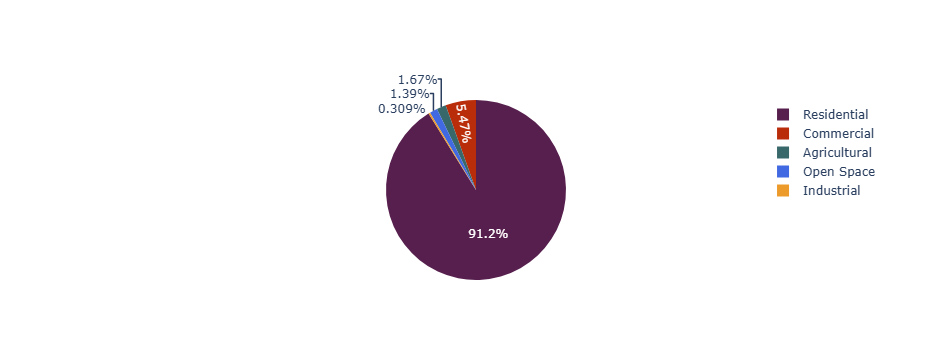

In [7]:
#Figure 1: Pie Chart

fig1=go.Figure(data=[go.Pie(labels=df_tn_prop.groupby('Property Type')['Sale Amount'].count().index,
                     values=df_tn_prop.groupby('Property Type')['Sale Amount'].count(),
                     marker=dict(colors=color_sequence)
                           )])
fig1.show()

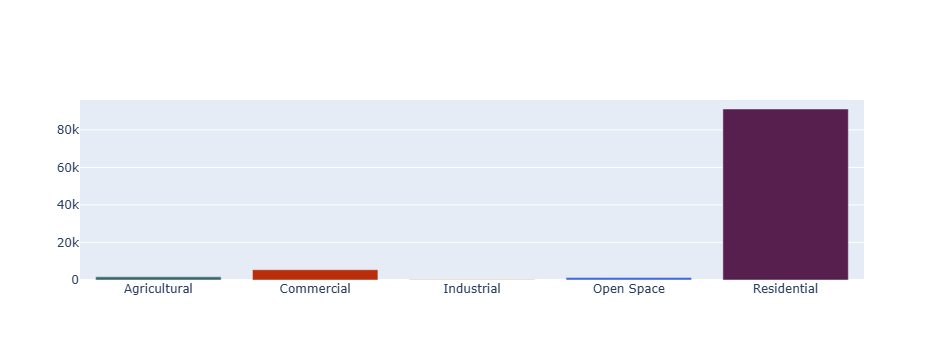

In [8]:
#Figure 2: Bar Graph

fig2=go.Figure([go.Bar(x=df_tn_prop.groupby('Property Type')['Sale Amount'].count().index,
                       y=df_tn_prop.groupby('Property Type')['Sale Amount'].count(),
                       marker=dict(color=color_sequence))])
fig2.show()

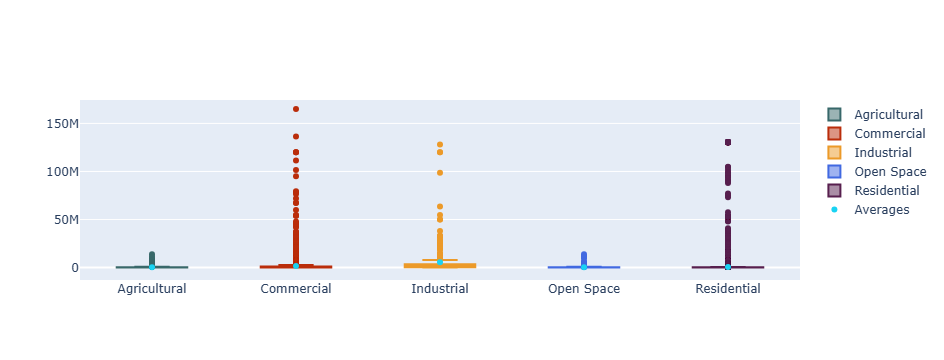

In [9]:
#Figure 3: Boxplot

fig3=go.Figure([go.Box(y=df_tn_prop[df_tn_prop['Property Type']=="Agricultural"]['Sale Amount'], name='Agricultural', marker_color='#38686A'),
                go.Box(y=df_tn_prop[df_tn_prop['Property Type']=="Commercial"]['Sale Amount'], name='Commercial', marker_color='#BA2D0B'), 
                go.Box(y=df_tn_prop[df_tn_prop['Property Type']=="Industrial"]['Sale Amount'], name='Industrial', marker_color='#EC9A29'),
                go.Box(y=df_tn_prop[df_tn_prop['Property Type']=="Open Space"]['Sale Amount'], name='Open Space', marker_color='#4169E1'),
                go.Box(y=df_tn_prop[df_tn_prop['Property Type']=="Residential"]['Sale Amount'], name='Residential', marker_color='#571F4E'),
                go.Scatter(x=["Residential","Commercial", "Agricultural", "Industrial", "Open Space"],y=[df_tn_prop[df_tn_prop['Property Type']=="Residential"]['Sale Amount'].mean(),
                                                                                                         df_tn_prop[df_tn_prop['Property Type']=="Commercial"]['Sale Amount'].mean(), 
                                                                                                         df_tn_prop[df_tn_prop['Property Type']=="Agricultural"]['Sale Amount'].mean(), 
                                                                                                         df_tn_prop[df_tn_prop['Property Type']=="Industrial"]['Sale Amount'].mean(), 
                                                                                                         df_tn_prop[df_tn_prop['Property Type']=="Open Space"]['Sale Amount'].mean()], mode="markers", name="Averages")])


fig3.show()

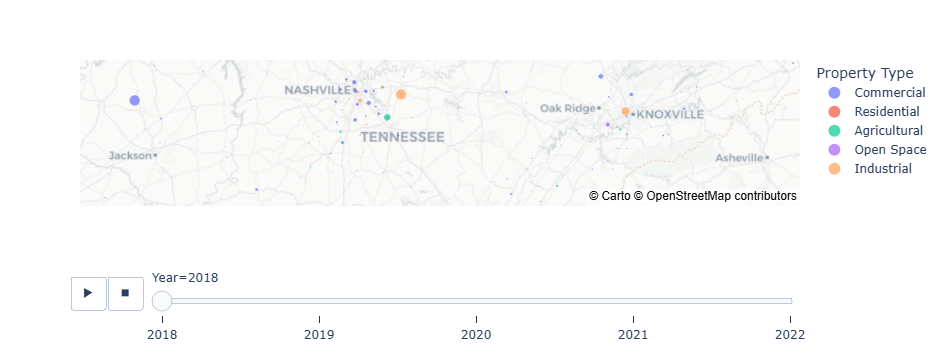

In [10]:
#Figure 4: Map 

# Putting latitudes and longitudes into bins of 0.1 degree intervals
df_tn_prop["Lat_Bin"] = np.floor(df_tn_prop["Lat"] * 10) / 10
df_tn_prop["Lng_Bin"] = np.floor(df_tn_prop["Lng"] * 10) / 10

df_map = df_tn_prop.groupby(["Lat_Bin", "Lng_Bin", "Property Type", "Year"], as_index=False).agg({
    "Sale Amount": "median",  
    "Lat": "mean",  # To determine where to plot the dot
    "Lng": "mean"  # To determine where to plot the dot
})


df_map.columns = ["Lat_Bin", "Lng_Bin", "Property Type", "Year", "Median Sale Amount", "Lat", "Lng",]

df_map["Year"] = df_map["Year"].astype(int)

df_map = df_map.sort_values(by="Year")

fig4 = px.scatter_mapbox(df_map,
                        lat="Lat",
                        lon="Lng",
                        color="Property Type",
                        size="Median Sale Amount",  
                        zoom=6.1, 
                        hover_name="Property Type", 
                        hover_data={"Median Sale Amount": ":$,.0f"},
                        animation_frame="Year",
                        mapbox_style="carto-positron", 
                        #mapbox_style="open-street-map", # in case I want to use a different map style
                        #mapbox_style="carto-darkmatter",
                        center={"lat": 35.8, "lon": -85.9}  
                    )

fig4.show()

In [11]:
df_map

Lat_Bin  Lng_Bin Property Type  Year  Median Sale Amount    Lat    Lng
0        34.9    -85.4    Commercial  2018            330000.0  34.99 -85.35
1184     35.4    -89.9   Residential  2018            181500.0  35.46 -89.82
3493     36.2    -87.3  Agricultural  2018            323800.0  36.24 -87.27
3495     36.2    -87.3   Residential  2018            170000.0  36.24 -87.27
1179     35.4    -90.0   Residential  2018            200000.0  35.47 -89.95
...       ...      ...           ...   ...                 ...    ...    ...
3451     36.2    -88.9    Commercial  2022             40000.0  36.24 -88.86
1221     35.4    -88.8   Residential  2022            112500.0  35.48 -88.74
3448     36.2    -89.1   Residential  2022             17000.0  36.20 -89.05
1234     35.4    -88.7   Residential  2022            141550.0  35.40 -88.68
4775     36.6    -86.7   Residential  2022            400000.0  36.61 -86.70

[4776 rows x 7 columns]

C:\Users\Emma Lakatosh\AppData\Local\Temp\ipykernel_12388\2107068027.py:15: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



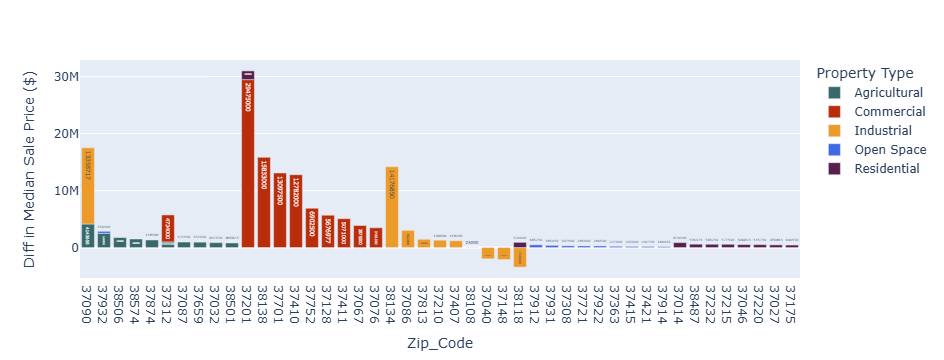

In [12]:
#Figure 5: Bar Graph

median_by_year = (
    df_tn_prop.groupby(["Zip_Code", "Property Type", "Year"])["Sale Amount"].median().reset_index())

median_pivot_property = median_by_year.pivot(index=["Zip_Code", "Property Type"], columns="Year", values="Sale Amount").reset_index()

median_pivot_property["Zip_Code"] = median_pivot_property["Zip_Code"].astype(str).str.zfill(5)

last_year = 2022  #really don't need these but kept the variables in the event this were to be more dynamic
first_year = 2018

median_pivot_property["Diff in Median Sale Price"] = median_pivot_property[last_year] - median_pivot_property[first_year]

df_top_10_property = median_pivot_property.groupby("Property Type", group_keys=False).apply(lambda group: group.nlargest(10, "Diff in Median Sale Price")).reset_index(drop=True)

fig5 = px.bar(
        df_top_10_property,
        x="Zip_Code",
        y="Diff in Median Sale Price",
        color = "Property Type",
        labels={"Diff in Median Sale Price": "Diff in Median Sale Price ($)"},
        text="Diff in Median Sale Price",
        color_discrete_map={"Agricultural": "#38686A", "Commercial": "#BA2D0B", "Industrial": "#EC9A29", "Open Space": "#4169E1", "Residential": "#571F4E"}
    )

fig5.show()

In [13]:
#Definitions

#Style

style_for_label=dict(color="maroon",
                     fontWeight="bold",
                     borderRadius='5px',
                     fontSize=10)

style_for_input=dict(width='200px', 
                     height='30px',
                     border='2px solid blue',
                     fontSize=20, 
                     fontFamily='Times New Roman')

style_for_button=dict(width='300px', 
                     height='50px',
                     border='2px solid #571F4E',
                     background="#FAE8EB",
                     color="#571F4E",
                     fontSize=30,
                     fontFamily='Times New Roman',
                     borderRadius = '15px')

style_for_button_click=dict(width='300px',
                            height='50px',
                            border='2px solid blue',
                            background='dark blue',
                            fontSize=30,
                            borderRadius='15px')

#Style for 2 Plots in 1 Row

my_div_style1=dict(width='50%', display='inline-block')  

D1_1=html.Div(id = 'row3col1',    
            children = dcc.Graph(figure=fig1),
            style=my_div_style1)
D1_2=html.Div(id = 'row3col2',    
             children = dcc.Graph(figure=fig2),
             style=my_div_style1)



#Layout Components

Hd = html.H1('Tennessee Real Estate Sales Analysis')

Author = html.H4('Crafted by Emma Lakatosh')

SubHd = html.H5('(Data Collected from 2018 through 2022 | 100,000 Rows Randomly Sampled from Over 600,000 Rows)')

Hline = html.Hr() 

Increase_button=html.Button(id="increase_button", n_clicks=0, children="Following Year", style=style_for_button)

Decrease_button=html.Button(id="decrease_button", n_clicks=0, children="Previous Year", style=style_for_button)

Dropdown = html.Div(dcc.Dropdown(id="zip_dropdown",
                            options=[{'label': "All Zip Codes", "value":"All"}]+[{'label': str(Zip_Code), "value": Zip_Code}  for Zip_Code in sorted(df_tn_prop['Zip_Code'].unique()) ],
                            value="All",
                            multi=True,
                            style=dict(width='300px', fontSize=25)),
                            style = {'display': 'flex', 'justify-content': 'center', 'align-items': 'center', 'margin-bottom': '20px'})

Controls = html.Div([
                html.Div([
                    Decrease_button,
                    Increase_button], style = {'display': 'flex', 'gap': '20px', 'margin-bottom': '20px'}),
                    Dropdown], style={'display': 'flex', 'flexDirection': 'column', 'justify-content': 'center', 'align-items': 'center', 'margin-bottom': '20px'})

Checklist_Label_Map = html.Label("Property Type (Multiple Options Can Be Selected)")

Checklist_Map = dcc.Checklist(id="my_checklist_map",
                           options=[{'label': s, "value":s}   for s in sorted(df_tn_prop["Property Type"].unique()) ],
                           value=["Residential","Commercial", "Agricultural", "Open Space", "Industrial"],
                           inline=True,
                           style={'display': 'flex', 'justify-content': 'center', 'align-items': 'center'}) 

Checklist_Label_Bar = html.Label("Property Type (Multiple Options Can Be Selected)")

Checklist_Bar = dcc.Checklist(id="my_checklist_bar",
                           options=[{'label': s, "value":s}   for s in sorted(df_tn_prop["Property Type"].unique()) ],
                           value=["Residential","Commercial", "Agricultural", "Open Space", "Industrial"],
                           inline=True,
                           style={'display': 'flex', 'justify-content': 'center', 'align-items': 'center'}) 

Button_Dropdown_Description = html.H3('Increase or Decrease by Year & Investigate by Zip Code')

Pie_Hd = html.H2('Sales Volume by Property Type')

Boxplot_Hd = html.H2('Sale Amount by Property Type')

Map_Hd = html.H2('Median Sale Price') 

Map_SubHd = html.H4('Latitudes & Longitudes in Bins of 0.1 Degree Intervals')

Bar_Hd = html.H2('Median Sale Price Increase in Top 10 ZIP Codes (2018 to 2022)') 

#Row 1 with Pie Chart & Bar Graph
D1=html.Div(id = 'row1', children = [D1_1,D1_2], 
            style={'display':'flex', 'justify-content': 'center'}) # This row has 2 graphs in it

#Row 2 with Boxplot
myGraph2  = dcc.Graph(figure = fig3)  
D2=html.Div(id = 'boxplot_graph', children = myGraph2)

#Row 3 with Map
myGraph3 = dcc.Graph(figure = fig4)
D3 = html.Div(id = 'map_graph', children = myGraph3)

#Row 4 with Barplot
myGraph4 = dcc.Graph(figure = fig5)
D4 = html.Div(id = 'barplot_graph', children = myGraph4)

In [14]:
my_app.layout = html.Div(children=[ Hd,
                                    Author,
                                    SubHd,
                                    Hline,
                                    Button_Dropdown_Description,
                                    Controls,
                                    Hline,
                                    Pie_Hd,
                                    D1, #Pie Chart & Bar Graph
                                    Hline,
                                    Boxplot_Hd,
                                    D2, #Boxplot
                                    Hline,
                                    Map_Hd,
                                    Map_SubHd,
                                    Checklist_Label_Map,
                                    Checklist_Map,
                                    D3, #Map
                                    Hline, 
                                    Bar_Hd,
                                    Checklist_Label_Bar,
                                    Checklist_Bar,
                                    D4 #Bar Graph
                                  ], style = {'textAlign': 'center'}) 
                                    

In [15]:
# Callback: Year Button & Zip Code Dropdown

@my_app.callback(
    [Output('row1', 'children'),
    Output('boxplot_graph', 'children')],
    [Input('decrease_button', 'n_clicks'),
     Input('increase_button', 'n_clicks'),
     Input('zip_dropdown', 'value')
    ]) 

def update_year(nc1, nc2, ddb):
    given_year=starting_year+(nc2-nc1)  

    if given_year> df_tn_prop.Year.max(): given_year = df_tn_prop.Year.max()
    if given_year< df_tn_prop.Year.min(): given_year = df_tn_prop.Year.min()

    df_short=df_tn_prop[df_tn_prop.Year==int(given_year)]  # shorter data frame based on year

    year_lb=str(int(given_year))

    if "All" in ddb or not ddb:
        df_short=df_tn_prop[df_tn_prop.Year == int(given_year)]
        zip_lb = "All Zip Codes"
    else:
        df_short = df_tn_prop[(df_tn_prop.Year == int(given_year)) & (df_tn_prop['Zip_Code'].isin(ddb))]
        zip_lb='Zip Codes: ' + ', '.join(map(str,ddb))

    #combined title
    title_text = f"{year_lb} | {zip_lb}"

    fig1=go.Figure([go.Pie(
                        labels=df_short.groupby('Property Type')['Sale Amount'].count().index,
                        values=df_short.groupby('Property Type')['Sale Amount'].count(),
                        marker=dict(colors=color_sequence))
                                          ])

    fig1.update_layout(title={'text': title_text, 'font': { 'family': 'Times New Roman', 'color': '#571F4E'}},
                      title_x=0.5, 
                      font=dict(color="purple", size=15))

    graph = dcc.Graph(figure = fig1)

    fig2=go.Figure([go.Bar(
                        x=df_short.groupby('Property Type')['Sale Amount'].count().index,
                        y=df_short.groupby('Property Type')['Sale Amount'].count(),
                      marker=dict(color=color_sequence))])

    fig2.update_layout(title={'text': title_text, 'font': { 'family': 'Times New Roman', 'color': '#571F4E'}},
                      title_x=0.5, 
                      font=dict(color="purple", size=15))

    graph2 = dcc.Graph(figure = fig2)

    row1_output = html.Div([graph, graph2], style={'display': 'flex', 'justify-content': 'center'})

    fig3=go.Figure([go.Box(y=df_short[df_short['Property Type']=="Agricultural"]['Sale Amount'], name='Agricultural', marker_color='#38686A'),
                    go.Box(y=df_short[df_short['Property Type']=="Commercial"]['Sale Amount'], name='Commercial', marker_color='#BA2D0B'), 
                    go.Box(y=df_short[df_short['Property Type']=="Industrial"]['Sale Amount'], name='Industrial', marker_color='#EC9A29'),
                    go.Box(y=df_short[df_short['Property Type']=="Open Space"]['Sale Amount'], name='Open Space', marker_color='#4169E1'),
                    go.Box(y=df_short[df_short['Property Type']=="Residential"]['Sale Amount'], name='Residential', marker_color='#571F4E'),
                    go.Scatter(x=["Residential","Commercial", "Agricultural", "Industrial", "Open Space"],y=[df_short[df_short['Property Type']=="Residential"]['Sale Amount'].mean(),
                                                                                                             df_short[df_short['Property Type']=="Commercial"]['Sale Amount'].mean(), 
                                                                                                             df_short[df_short['Property Type']=="Agricultural"]['Sale Amount'].mean(), 
                                                                                                             df_short[df_short['Property Type']=="Industrial"]['Sale Amount'].mean(), 
                                                                                                             df_short[df_short['Property Type']=="Open Space"]['Sale Amount'].mean()], mode="markers", name="Averages")])
    
    
    fig3.update_layout(title={'text': title_text, 'font': {'family': 'Times New Roman', 'color': '#571F4E'}},
                      title_x=0.5, # centered
                      font=dict(color="purple", size=15),
                      yaxis=dict(title="Sale Amount ($)", tickformat="$,.0f"))

    graph3 = dcc.Graph(figure = fig3)

  
    return row1_output, graph3
    

In [16]:
#Callback: Checklist for Map

@my_app.callback(
    Output('map_graph', 'children'),
    [Input('my_checklist_map', 'value')]
)

def update_graph(selected_types):
    # Response if no property types are selected
    if not selected_types:
        return html.Div("Must select property type to see graph :)", style={"textAlign": "center", "marginTop": "20px"})

    df_map_filter = df_map[df_map["Property Type"].isin(selected_types)]

    if df_map_filter.empty:
        return html.Div("No data available for the selected property types.", style={"textAlign": "center", "marginTop": "20px"})

    fig4 = px.scatter_mapbox(df_map_filter,
                        lat="Lat",
                        lon="Lng",
                        color="Property Type",
                        size="Median Sale Amount",  
                        zoom=6.1, 
                        hover_name="Property Type", 
                        hover_data={"Median Sale Amount": ":$,.0f"},
                        animation_frame="Year",
                        mapbox_style="carto-positron", 
                        center={"lat": 35.8, "lon": -85.9}  
                    )
   

    return dcc.Graph(figure=fig4)

In [17]:
#Callback: Checklist for Increase in Median Sale Price

@my_app.callback(
    Output('barplot_graph', 'children'),
    [Input('my_checklist_bar', 'value')]
)

def update_graph(selected_types):
    # Response if no property types are selected
    if not selected_types:
        return html.Div("Must select property type to see graph :)", style={"textAlign": "center", "marginTop": "20px"})

    filtered_df = df_top_10_property[df_top_10_property["Property Type"].isin(selected_types)]

    filtered_df = filtered_df.nlargest(10, "Diff in Median Sale Price")

    if filtered_df.empty:
        return html.Div("No data available for the selected property types.", style={"textAlign": "center", "marginTop": "20px"})

    filtered_df = filtered_df.sort_values(by="Diff in Median Sale Price", ascending=False)

    fig5 = px.bar(
        filtered_df,
        x="Zip_Code",
        y="Diff in Median Sale Price",
        color="Property Type",
        labels={"Diff in Median Sale Price": "Diff in Median Sale Price ($)", "Zip_Code": "ZIP Code"},
        text="Diff in Median Sale Price",  # Show values on the bars
        color_discrete_map={"Agricultural": "#38686A", "Commercial": "#BA2D0B", "Industrial": "#EC9A29", "Open Space": "#4169E1", "Residential": "#571F4E"}
    )

    fig5.update_traces(
    texttemplate="$%{text:,.0f}",  # "," adds a comma, ".0" ensures there are no 0s after the decimal (no cents shown)
    textposition="outside" 
    )

    fig5.update_layout(
        xaxis=dict(categoryorder="total descending")  # Sorting bars by their total value
    )

    return dcc.Graph(figure=fig5)

In [18]:
my_app.run(jupyter_mode="tab", port = 1080)

Dash app running on http://127.0.0.1:1080/


<IPython.core.display.Javascript object>

In [19]:
end_time = time.time()

total_run_time = end_time - start_time
total_run_time

4.288413047790527

In [20]:
playsound('bossa-nova-eletric-guitar-loop-258055.mp3')


    Error 259 for command:
        play bossa-nova-eletric-guitar-loop-258055.mp3 wait
    The driver cannot recognize the specified command parameter.

    Error 263 for command:
        close bossa-nova-eletric-guitar-loop-258055.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: bossa-nova-eletric-guitar-loop-258055.mp3


PlaysoundException: 
    Error 259 for command:
        play bossa-nova-eletric-guitar-loop-258055.mp3 wait
    The driver cannot recognize the specified command parameter.